In [11]:
import geopandas as gpd
import pandas as pd
import folium
import numpy as np
from shapely.geometry import box
import rasterio
import matplotlib.pyplot as plt
import os
import osmnx as ox
from shapely.geometry import box

In [2]:
mumbai = gpd.read_file('Границы/mumbai_boundary.gpkg')
nd = gpd.read_file('Границы/new_delhi_boundary.gpkg')
bangalore = gpd.read_file('Границы/bangalore_boundary.gpkg')

# Это необрезанные по маскам городов домики, их я обработаю и получу те, что ниже

mumbai_builds = gpd.read_file('Домики/mumbai_builds.geojson')
bangalore_builds = gpd.read_file('Домики/bangalore_builds.geojson')
delhi_1_builds = gpd.read_file('Домики/delhi_1_builds.geojson')
delhi_2_builds = gpd.read_file('Домики/delhi_2_builds.geojson')

# mumbai_builds_osm_clipped = gpd.read_file('data/mumbai_builds_osm_clipped.geojson')
# mumbai_builds_clipped = gpd.read_file('data/mumbai_builds_clipped.geojson')
# bangalore_builds_clipped = gpd.read_file('data/bangalore_builds_clipped.geojson')
# delhi_2_builds_clipped = gpd.read_file('data/delhi_2_builds_clipped.geojson')

In [179]:
# обрезка tifов по маскам городов

directory_path = 'снимки'

tif_files = [f for f in os.listdir(directory_path) if f.endswith('.tif')]
for file in tif_files:
    if 'Mumbai' in file:
        city_mask = mumbai.geometry
    elif 'NewDelhi' in file:
        city_mask = nd.geometry
    elif 'Bengaluru' in file:
        city_mask = bangalore.geometry
    # Откройте TIFF файл
    with rasterio.open('снимки/'+file) as src:
        out_image, out_transform = mask(src, city_mask, crop=True)
        out_meta = src.meta.copy()
    
    # Обновите метаданные
    out_meta.update({
        "driver": "GTiff",
        "height": out_image.shape[1],
        "width": out_image.shape[2],
        "transform": out_transform
    })
    
    # Сохраните обрезанный файл
    with rasterio.open('снимки/cropped/' + file[:-4] + '_cr.tif', 'w', **out_meta) as dest:
        dest.write(out_image)

### Посмотрим на Мумбаи

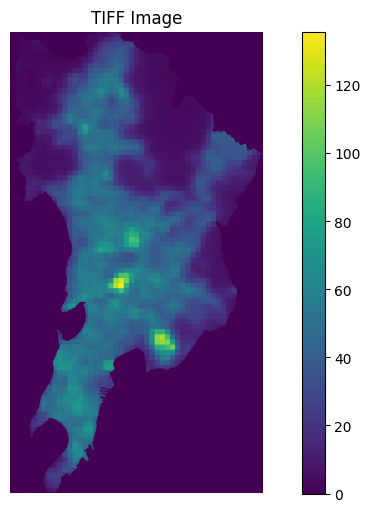

In [180]:
with rasterio.open('снимки/cropped/Mumbai_NightLights_2024_2025_new_cr.tif') as src:
    data = src.read(1) #Свет ночью

plt.figure(figsize=(10, 6))
plt.imshow(data)
plt.colorbar()
plt.title('TIFF Image')
plt.axis('off')
plt.show()

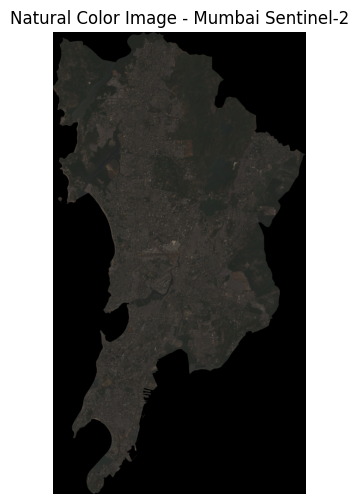

In [74]:
with rasterio.open('снимки/cropped/Mumbai_Sentinel-2_cr.tif') as src:
    # Чтение нужных каналов для естественного цвета
    red = src.read(3)   # Красный канал
    green = src.read(2) # Зеленый канал
    blue = src.read(1)  # Синий канал

natural_color = np.dstack((red, green, blue))

plt.figure(figsize=(10, 6))
plt.imshow(natural_color)
plt.title('Natural Color Image - Mumbai Sentinel-2')
plt.axis('off')
plt.show()

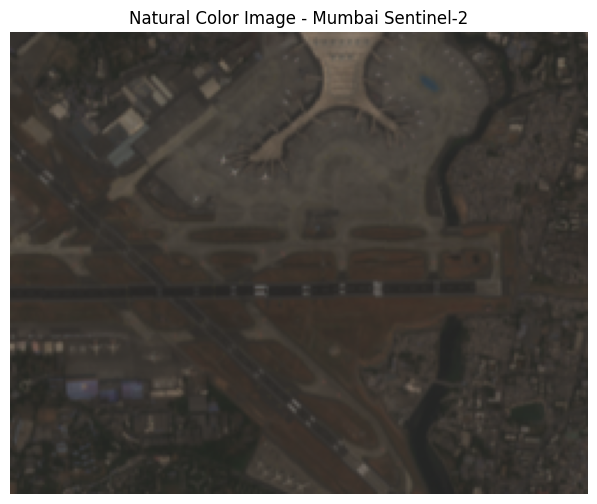

In [182]:
with rasterio.open('снимки/cropped/Mumbai_Sentinel-2_cr.tif') as src:
    # Чтение нужных каналов для естественного цвета
    red = src.read(3)   # Красный канал
    green = src.read(2) # Зеленый канал
    blue = src.read(1)  # Синий канал
    
natural_color = np.dstack((red, green, blue))

plt.figure(figsize=(10, 6))
plt.imshow(natural_color[1900:2100, 950:1200])
plt.title('Natural Color Image - Mumbai Sentinel-2')
plt.axis('off')
plt.show()


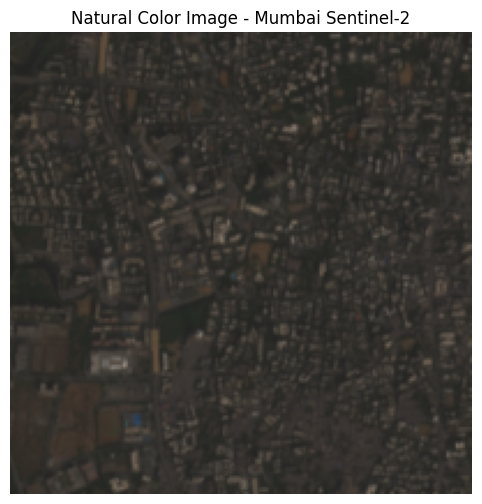

In [183]:
with rasterio.open('снимки/cropped/Mumbai_Sentinel-2_cr.tif') as src:
    # Чтение нужных каналов для естественного цвета
    red = src.read(3)   # Красный канал
    green = src.read(2) # Зеленый канал
    blue = src.read(1)  # Синий канал

natural_color = np.dstack((red, green, blue))

plt.figure(figsize=(10, 6))
plt.imshow(natural_color[800:1000, 600:800])
plt.title('Natural Color Image - Mumbai Sentinel-2')
plt.axis('off')
plt.show()

Проверим совпадают ли индексы, посчитанные в Google Earth Engine и в Python

`Спойлер: да`

C:\Users\Mariia\AppData\Local\Temp\ipykernel_27788\793696158.py:6: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red) / (nir + red)


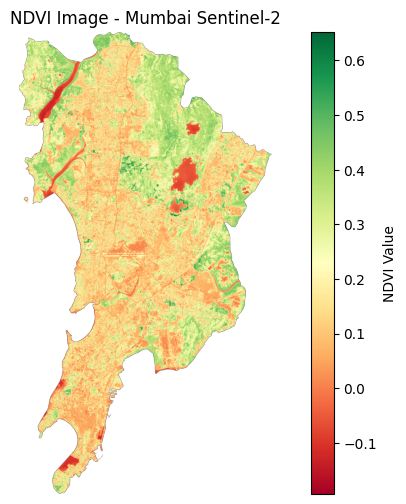

In [184]:
with rasterio.open('снимки/cropped/Mumbai_Sentinel-2_cr.tif') as src:
    # Чтение нужных каналов для расчета NDVI
    red = src.read(3)   # Красный канал
    nir = src.read(4)   # Ближний инфракрасный канал

ndvi = (nir - red) / (nir + red)

plt.figure(figsize=(10, 6))
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar(label='NDVI Value')
plt.title('NDVI Image - Mumbai Sentinel-2')
plt.axis('off')
plt.show()

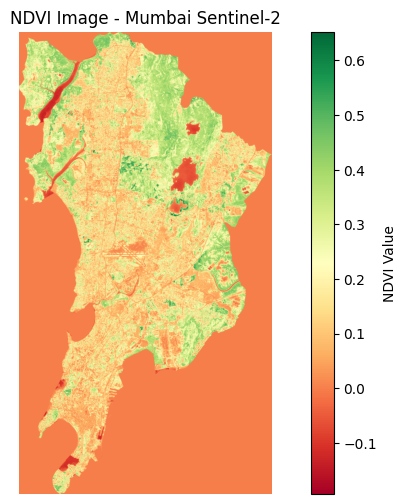

In [185]:
with rasterio.open('снимки/cropped/Mumbai_NDVI_2024_2025_cr.tif') as src: 
    data = src.read(1) #NDVI, посчитанный в Google Earth Engine

plt.figure(figsize=(10, 6))
plt.imshow(data, cmap='RdYlGn')
plt.colorbar(label='NDVI Value')
plt.title('NDVI Image - Mumbai Sentinel-2')
plt.axis('off')
plt.show()

C:\Users\Mariia\AppData\Local\Temp\ipykernel_27788\3779170457.py:6: RuntimeWarning: invalid value encountered in divide
  ndbi = (swir - nir) / (swir + nir)


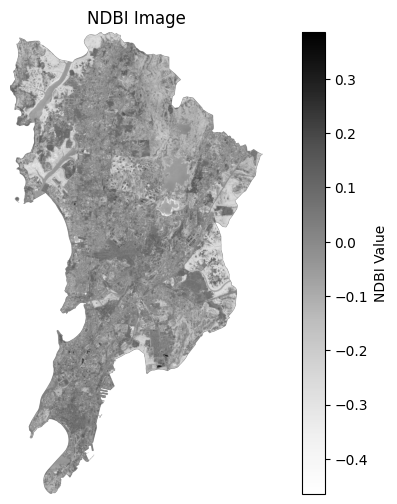

In [186]:
with rasterio.open('снимки/cropped/Mumbai_Sentinel-2_cr.tif') as src:
    # Чтение нужных каналов для расчета NDBI
    nir = src.read(4)   # Ближний инфракрасный канал (NIR)
    swir = src.read(5)  # Среднеинфракрасный канал (SWIR)

ndbi = (swir - nir) / (swir + nir)

plt.figure(figsize=(10, 6))
plt.imshow(ndbi, cmap='Greys')
plt.colorbar(label='NDBI Value')
plt.title('NDBI Image')
plt.axis('off')
plt.show()

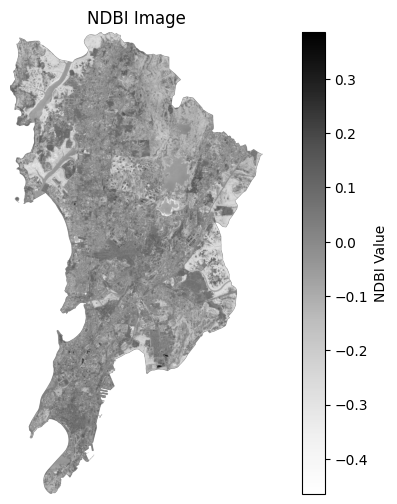

In [187]:
with rasterio.open('снимки/cropped/Mumbai_NDBI_2024_2025_cr.tif') as src:
    data = src.read(1)  #NDBI, посчитанный в Google Earth Engine

plt.figure(figsize=(10, 6))
plt.imshow(ndbi, cmap='Greys')
plt.colorbar(label='NDBI Value')
plt.title('NDBI Image')
plt.axis('off')
plt.show()

In [168]:
# Функция для извлечения значения confidence
import json

def extract_confidence(json_str):
    try:
        # Парсим строку JSON
        data = json.loads(json_str)
        return data.get('confidence', None)
    except json.JSONDecodeError:
        return None

mumbai_builds['confidence'] = mumbai_builds['properties'].apply(extract_confidence)
bangalore_builds['confidence'] = bangalore_builds['properties'].apply(extract_confidence)
delhi_1_builds['confidence'] = delhi_1_builds['properties'].apply(extract_confidence)
delhi_2_builds['confidence'] = delhi_2_builds['properties'].apply(extract_confidence)

# mumbai_builds.to_file('data/mumbai_builds.geojson', driver='GeoJSON')
# bangalore_builds.to_file('data/bangalore_builds.geojson', driver='GeoJSON')
# delhi_1_builds.to_file('data/delhi_1_builds.geojson', driver='GeoJSON')
# delhi_2_builds.to_file('data/delhi_2_builds.geojson', driver='GeoJSON')

In [192]:
# Смотрим на уверенность моддели

def check_conf(data, city_name):
    print(f'Количество домиков в {city_name}: {len(data)}')
    print(f'Количество домиков с высокой достоверностью в {city_name}: {len(data[data['confidence']>0])}')
    print(f'Доля домиков с высокой достоверностью в {city_name}: {len(data[data['confidence']>0])/len(data)*100:.2f} %')
    print()
    
check_conf(mumbai_builds, 'Мумбаи')
check_conf(bangalore_builds, 'Бангалоре')
check_conf(delhi_1_builds, 'Нью-Дели (1 файл)')
check_conf(delhi_2_builds, 'Нью-Дели (2 файл)')

Количество домиков в Мумбаи: 329823
Количество домиков с высокой достоверностью в Мумбаи: 0
Доля домиков с высокой достоверностью в Мумбаи: 0.00 %

Количество домиков в Бангалоре: 1063902
Количество домиков с высокой достоверностью в Бангалоре: 5224
Доля домиков с высокой достоверностью в Бангалоре: 0.49 %

Количество домиков в Нью-Дели (1 файл): 1001982
Количество домиков с высокой достоверностью в Нью-Дели (1 файл): 1001926
Доля домиков с высокой достоверностью в Нью-Дели (1 файл): 99.99 %

Количество домиков в Нью-Дели (2 файл): 1187957
Количество домиков с высокой достоверностью в Нью-Дели (2 файл): 894617
Доля домиков с высокой достоверностью в Нью-Дели (2 файл): 75.31 %



#### Че-то как-то не очень, но возможно это баг датаета + альтернатива в виде OSM тоже плоха

In [195]:
def to_clip_builds(builds, city_mask, city_name):
    builds = builds.to_crs(city_mask.crs)
    mask_val = builds.is_valid
    # Проверка валидности геометрий
    invalid_builds = builds[~mask_val]
    valid_builds = builds[mask_val]
    if not invalid_builds.empty:
        print(f"Некоторые геометрии в {city_name}_builds невалидны")
    clipped_builds = valid_builds.clip(mask=city_mask)
    print(len(clipped_builds))

    output_path = 'data/' + city_name + '_builds_clipped.geojson'
    clipped_builds.to_file(output_path, driver='GeoJSON')
    return clipped_builds
    
mumbai_builds_clipped = to_clip_builds(mumbai_builds, mumbai, 'mumbai')
bangalore_builds_clipped = to_clip_builds(bangalore_builds, bangalore, 'bangalore')
delhi_1_builds_clipped = to_clip_builds(delhi_1_builds, nd, 'delhi_1')
delhi_2_builds_clipped = to_clip_builds(delhi_2_builds, nd, 'delhi_2')

Некоторые геометрии в mumbai_builds невалидны
133685
Некоторые геометрии в bangalore_builds невалидны
597584
Некоторые геометрии в delhi_1_builds невалидны
3
Некоторые геометрии в delhi_2_builds невалидны
531243


#### В delhi_1 какие_то осколки, поэтому не будем их рассматривать

#### У нас недостаточно домиков в Мумбаи, скачаем из OSM

In [220]:
print("CRS исходного mumbai:", mumbai.crs)
mask_polygon = mumbai.geometry.unary_union
print(f"Тип mask_polygon: {type(mask_polygon)}, валидность: {mask_polygon.is_valid}")
tags = {"building": True}
buildings_gdf = ox.features_from_polygon(mask_polygon, tags)

print(f"Скачано всего объектов (в том числе точки/линии/полигоны): {len(buildings_gdf)}")

if buildings_gdf.crs != mumbai.crs:
    buildings_gdf = buildings_gdf.to_crs(mumbai.crs)

mumbai_builds_osm_clipped = buildings_gdf[
    buildings_gdf.geom_type.isin(["Polygon", "MultiPolygon"])
].copy()
print(f"После фильтрации по Polygon/MultiPolygon: {len(buildings_polygons)}")

mumbai_builds_osm_clipped.to_file("data/mumbai_builds_osm_clipped.geojson", driver="GeoJSON")

CRS исходного mumbai: EPSG:4326
Тип mask_polygon: <class 'shapely.geometry.multipolygon.MultiPolygon'>, валидность: True


C:\Users\Mariia\AppData\Local\Temp\ipykernel_27788\4045255055.py:7: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  mask_polygon = mumbai.geometry.unary_union


Скачано всего объектов (в том числе точки/линии/полигоны): 79578
После фильтрации по Polygon/MultiPolygon: 79225


In [249]:
mmumbai_builds_osm_clipped = mumbai_builds_osm_clipped.reset_index()[['geometry',
                                                                     'building',
                                                                     'building:levels']]
# mumbai_builds_osm_clipped.to_file("data/mumbai_builds_osm_clipped.geojson", driver="GeoJSON")

Далее для обучения модели для предсказания трущобной ззастройки мы будем использовать тайлы x на x метров (спойлер: 250x250), раз уж мы скачали OSM слой домиков на Мумбаи, достанем оттуда этажность, там где она есть (она мало, где есть, но есть) и сделаем агрегацию на тайлы разной размерности, чтобы посмотреть, как это вообще выглядит. Но использовать этажность для модели мы не будем, так как в ней слишком много пропусков

Всего записей в mumbai_builds_osm_clipped: 79225
Записей с ненулевым building:levels: 4736
CRS у mumbai_metric (должен быть 3857): EPSG:3857
CRS у df_points_metric (должен быть 3857): EPSG:3857
Центроидов внутри bbox района (из 4736 ): 4736
Всего ячеек до обрезки: 16284
Ячеек после обрезки по mumbai: 8699
Число центроидов, присоединённых к ячейкам: 3521


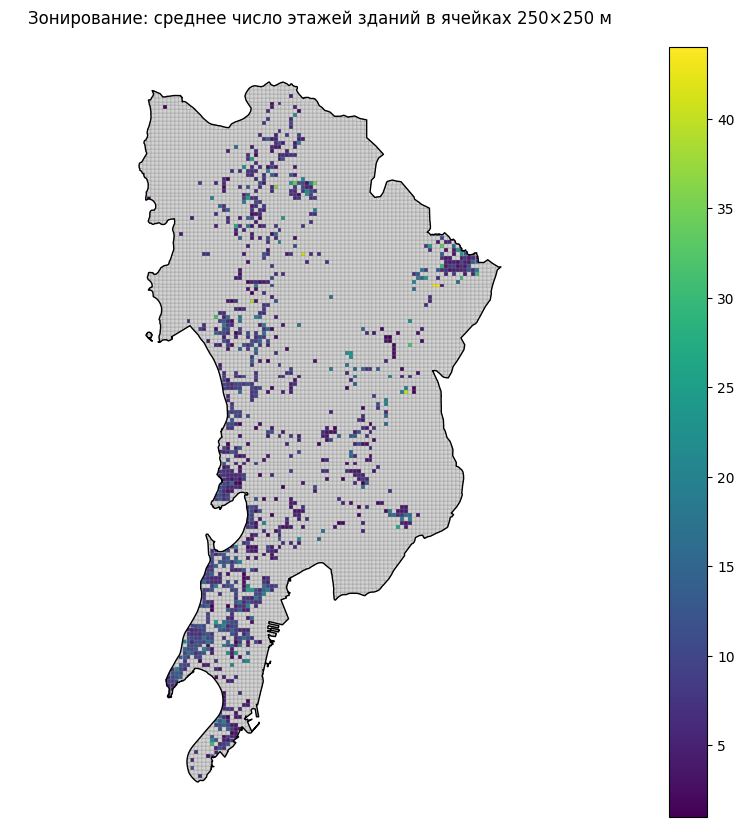

In [6]:
def to_del(value):
    if value in [str(i) for i in range(1, 50)]:
        return int(value)
    else:
        return None

print("Всего записей в mumbai_builds_osm_clipped:", len(mumbai_builds_osm_clipped))
print("Записей с ненулевым building:levels:",
      mumbai_builds_osm_clipped['building:levels'].dropna().shape[0])

mumbai_metric = mumbai.to_crs(epsg=3857)

buildings_metric = mumbai_builds_osm_clipped.to_crs(epsg=3857)

buildings_metric = buildings_metric.dropna(subset=['building:levels']).copy()
buildings_metric['building:levels'] = buildings_metric['building:levels'].apply(to_del)

buildings_metric['building:levels'] = buildings_metric['building:levels'].astype(float)

buildings_metric['centroid'] = buildings_metric.geometry.centroid

df_points_metric = buildings_metric.set_geometry('centroid')

print("CRS у mumbai_metric (должен быть 3857):", mumbai_metric.crs)
print("CRS у df_points_metric (должен быть 3857):", df_points_metric.crs)

minx, miny, maxx, maxy = mumbai_metric.total_bounds
pts_in_bbox = df_points_metric.cx[minx:maxx, miny:maxy].shape[0]
print("Центроидов внутри bbox района (из", len(df_points_metric), "):", pts_in_bbox)

minx, miny, maxx, maxy = mumbai_metric.total_bounds

cell_size = 250 
x_coords = np.arange(minx, maxx + cell_size, cell_size)
y_coords = np.arange(miny, maxy + cell_size, cell_size)

polygons = []
for x0 in x_coords[:-1]:
    for y0 in y_coords[:-1]:
        polygons.append(box(x0, y0, x0 + cell_size, y0 + cell_size))

grid = gpd.GeoDataFrame({'geometry': polygons}, crs=mumbai_metric.crs)
print("Всего ячеек до обрезки:", len(grid))

grid_clipped = gpd.overlay(grid, mumbai_metric, how='intersection')
print("Ячеек после обрезки по mumbai:", len(grid_clipped))
grid_clipped = grid_clipped.set_geometry('geometry')
df_points_metric = df_points_metric.set_geometry('geometry')
joined = gpd.sjoin(
    df_points_metric[['building:levels', 'geometry']],
    grid_clipped[['geometry']],
    how='inner',
    predicate='within'
)

print("Число центроидов, присоединённых к ячейкам:", len(joined))

if not joined.empty:
    mean_levels = joined.groupby('index_right')['building:levels'].mean()
    grid_clipped['mean_levels'] = np.nan
    grid_clipped.loc[mean_levels.index, 'mean_levels'] = mean_levels.values
else:
    grid_clipped['mean_levels'] = np.nan

fig, ax = plt.subplots(figsize=(10, 10))
grid_clipped.plot(
    column='mean_levels',
    cmap='viridis',
    legend=True,
    edgecolor='grey',
    linewidth=0.2,
    ax=ax,
    missing_kwds={'color': 'lightgrey'}
)

mumbai_metric.boundary.plot(ax=ax, edgecolor='black', linewidth=1)

ax.set_title('Зонирование: среднее число этажей зданий в ячейках 250×250 м')
ax.axis('equal')
ax.axis('off')

plt.show()


Всего записей в mumbai_builds_osm_clipped: 79225
Записей с ненулевым building:levels: 4736
CRS у mumbai_metric (должен быть 3857): EPSG:3857
CRS у df_points_metric (должен быть 3857): EPSG:3857
Центроидов внутри bbox района (из 4736 ): 4736
Всего ячеек до обрезки: 4094
Ячеек после обрезки по mumbai: 2267
Число центроидов, присоединённых к ячейкам: 4082


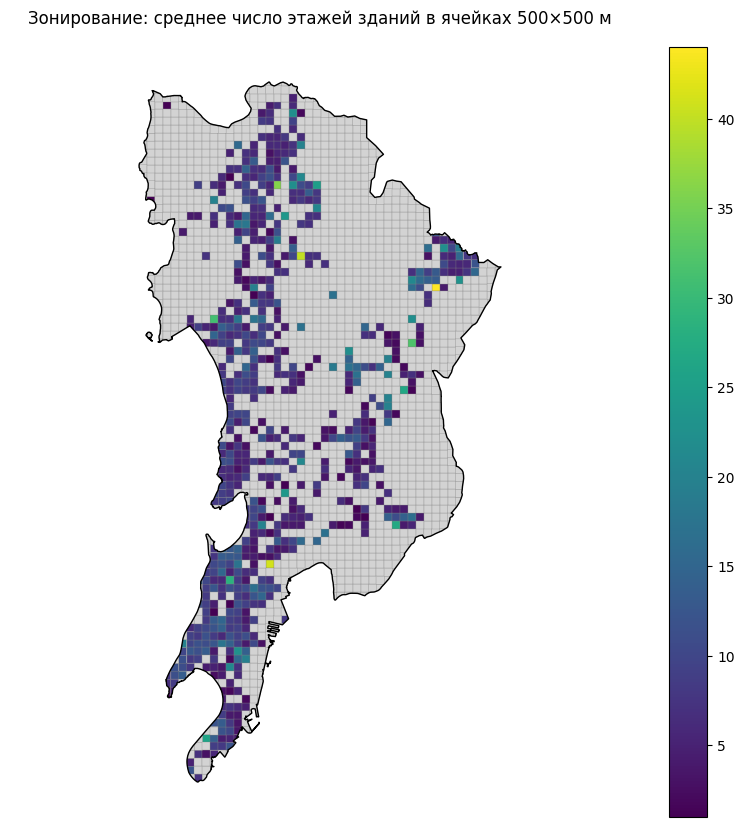

In [4]:
def to_del(value):
    if value in [str(i) for i in range(1, 50)]:
        return int(value)
    else:
        return None

print("Всего записей в mumbai_builds_osm_clipped:", len(mumbai_builds_osm_clipped))
print("Записей с ненулевым building:levels:",
      mumbai_builds_osm_clipped['building:levels'].dropna().shape[0])

mumbai_metric = mumbai.to_crs(epsg=3857)
buildings_metric = mumbai_builds_osm_clipped.to_crs(epsg=3857)
buildings_metric = buildings_metric.dropna(subset=['building:levels']).copy()
buildings_metric['building:levels'] = buildings_metric['building:levels'].apply(to_del)
buildings_metric['building:levels'] = buildings_metric['building:levels'].astype(float)

buildings_metric['centroid'] = buildings_metric.geometry.centroid
df_points_metric = buildings_metric.set_geometry('centroid')

print("CRS у mumbai_metric (должен быть 3857):", mumbai_metric.crs)
print("CRS у df_points_metric (должен быть 3857):", df_points_metric.crs)

minx, miny, maxx, maxy = mumbai_metric.total_bounds
pts_in_bbox = df_points_metric.cx[minx:maxx, miny:maxy].shape[0]
print("Центроидов внутри bbox района (из", len(df_points_metric), "):", pts_in_bbox)

minx, miny, maxx, maxy = mumbai_metric.total_bounds

cell_size = 500
x_coords = np.arange(minx, maxx + cell_size, cell_size)
y_coords = np.arange(miny, maxy + cell_size, cell_size)

polygons = []
for x0 in x_coords[:-1]:
    for y0 in y_coords[:-1]:
        polygons.append(box(x0, y0, x0 + cell_size, y0 + cell_size))

grid = gpd.GeoDataFrame({'geometry': polygons}, crs=mumbai_metric.crs)
print("Всего ячеек до обрезки:", len(grid))
grid_clipped = gpd.overlay(grid, mumbai_metric, how='intersection')
print("Ячеек после обрезки по mumbai:", len(grid_clipped))
grid_clipped = grid_clipped.set_geometry('geometry')
df_points_metric = df_points_metric.set_geometry('geometry')
joined = gpd.sjoin(
    df_points_metric[['building:levels', 'geometry']],
    grid_clipped[['geometry']],
    how='inner',
    predicate='within'
)
print("Число центроидов, присоединённых к ячейкам:", len(joined))
if not joined.empty:
    mean_levels = joined.groupby('index_right')['building:levels'].mean()
    grid_clipped['mean_levels'] = np.nan
    grid_clipped.loc[mean_levels.index, 'mean_levels'] = mean_levels.values
else:
    grid_clipped['mean_levels'] = np.nan

fig, ax = plt.subplots(figsize=(10, 10))
grid_clipped.plot(
    column='mean_levels',
    cmap='viridis',
    legend=True,
    edgecolor='grey',
    linewidth=0.2,
    ax=ax,
    missing_kwds={'color': 'lightgrey'}
)
mumbai_metric.boundary.plot(ax=ax, edgecolor='black', linewidth=1)
ax.set_title('Зонирование: среднее число этажей зданий в ячейках 500×500 м')
ax.axis('equal')
ax.axis('off')
plt.show()

Всего записей в mumbai_builds_osm_clipped: 79225
Записей с ненулевым building:levels: 4736
CRS у mumbai_metric (должен быть 3857): EPSG:3857
CRS у df_points_metric (должен быть 3857): EPSG:3857
Центроидов внутри bbox района (из 4736 ): 4736
Всего ячеек до обрезки: 1829
Ячеек после обрезки по mumbai: 1051
Число центроидов, присоединённых к ячейкам: 4309


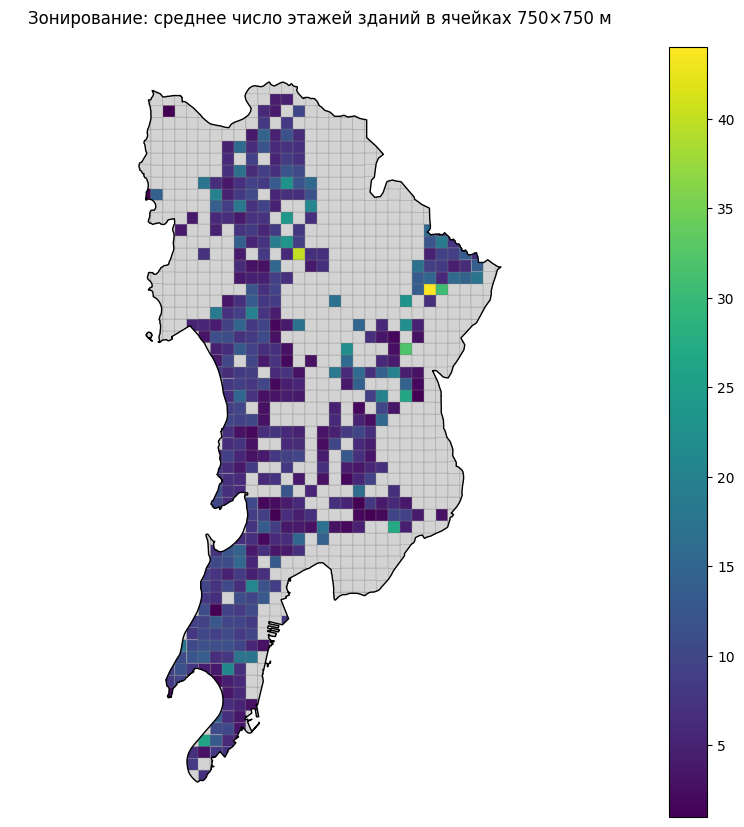

In [7]:
def to_del(value):
    if value in [str(i) for i in range(1, 50)]:
        return int(value)
    else:
        return None

print("Всего записей в mumbai_builds_osm_clipped:", len(mumbai_builds_osm_clipped))
print("Записей с ненулевым building:levels:",
      mumbai_builds_osm_clipped['building:levels'].dropna().shape[0])

mumbai_metric = mumbai.to_crs(epsg=3857)
buildings_metric = mumbai_builds_osm_clipped.to_crs(epsg=3857)
buildings_metric = buildings_metric.dropna(subset=['building:levels']).copy()
buildings_metric['building:levels'] = buildings_metric['building:levels'].apply(to_del)
buildings_metric['building:levels'] = buildings_metric['building:levels'].astype(float)

buildings_metric['centroid'] = buildings_metric.geometry.centroid
df_points_metric = buildings_metric.set_geometry('centroid')

print("CRS у mumbai_metric (должен быть 3857):", mumbai_metric.crs)
print("CRS у df_points_metric (должен быть 3857):", df_points_metric.crs)

minx, miny, maxx, maxy = mumbai_metric.total_bounds
pts_in_bbox = df_points_metric.cx[minx:maxx, miny:maxy].shape[0]
print("Центроидов внутри bbox района (из", len(df_points_metric), "):", pts_in_bbox)

minx, miny, maxx, maxy = mumbai_metric.total_bounds

cell_size = 750
x_coords = np.arange(minx, maxx + cell_size, cell_size)
y_coords = np.arange(miny, maxy + cell_size, cell_size)

polygons = []
for x0 in x_coords[:-1]:
    for y0 in y_coords[:-1]:
        polygons.append(box(x0, y0, x0 + cell_size, y0 + cell_size))

grid = gpd.GeoDataFrame({'geometry': polygons}, crs=mumbai_metric.crs)
print("Всего ячеек до обрезки:", len(grid))
grid_clipped = gpd.overlay(grid, mumbai_metric, how='intersection')
print("Ячеек после обрезки по mumbai:", len(grid_clipped))
grid_clipped = grid_clipped.set_geometry('geometry')
df_points_metric = df_points_metric.set_geometry('geometry')
joined = gpd.sjoin(
    df_points_metric[['building:levels', 'geometry']],
    grid_clipped[['geometry']],
    how='inner',
    predicate='within'
)
print("Число центроидов, присоединённых к ячейкам:", len(joined))
if not joined.empty:
    mean_levels = joined.groupby('index_right')['building:levels'].mean()
    grid_clipped['mean_levels'] = np.nan
    grid_clipped.loc[mean_levels.index, 'mean_levels'] = mean_levels.values
else:
    grid_clipped['mean_levels'] = np.nan

fig, ax = plt.subplots(figsize=(10, 10))
grid_clipped.plot(
    column='mean_levels',
    cmap='viridis',
    legend=True,
    edgecolor='grey',
    linewidth=0.2,
    ax=ax,
    missing_kwds={'color': 'lightgrey'}
)
mumbai_metric.boundary.plot(ax=ax, edgecolor='black', linewidth=1)
ax.set_title('Зонирование: среднее число этажей зданий в ячейках 750×750 м')
ax.axis('equal')
ax.axis('off')
plt.show()

Всего записей в mumbai_builds_osm_clipped: 79225
Записей с ненулевым building:levels: 4736
CRS у mumbai_metric (должен быть 3857): EPSG:3857
CRS у df_points_metric (должен быть 3857): EPSG:3857
Центроидов внутри bbox района (из 4736 ): 4736
Всего ячеек до обрезки: 1035
Ячеек после обрезки по mumbai: 615
Число центроидов, присоединённых к ячейкам: 4400


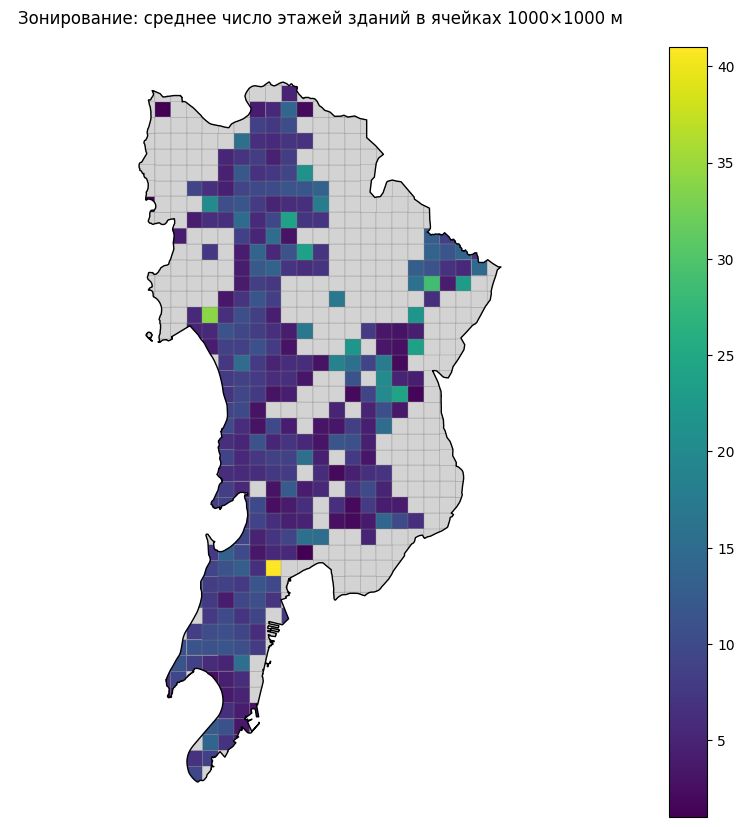

In [5]:
def to_del(value):
    if value in [str(i) for i in range(1, 50)]:
        return int(value)
    else:
        return None

print("Всего записей в mumbai_builds_osm_clipped:", len(mumbai_builds_osm_clipped))
print("Записей с ненулевым building:levels:",
      mumbai_builds_osm_clipped['building:levels'].dropna().shape[0])

mumbai_metric = mumbai.to_crs(epsg=3857)
buildings_metric = mumbai_builds_osm_clipped.to_crs(epsg=3857)
buildings_metric = buildings_metric.dropna(subset=['building:levels']).copy()
buildings_metric['building:levels'] = buildings_metric['building:levels'].apply(to_del)
buildings_metric['building:levels'] = buildings_metric['building:levels'].astype(float)

buildings_metric['centroid'] = buildings_metric.geometry.centroid
df_points_metric = buildings_metric.set_geometry('centroid')

print("CRS у mumbai_metric (должен быть 3857):", mumbai_metric.crs)
print("CRS у df_points_metric (должен быть 3857):", df_points_metric.crs)

minx, miny, maxx, maxy = mumbai_metric.total_bounds
pts_in_bbox = df_points_metric.cx[minx:maxx, miny:maxy].shape[0]
print("Центроидов внутри bbox района (из", len(df_points_metric), "):", pts_in_bbox)

minx, miny, maxx, maxy = mumbai_metric.total_bounds

cell_size = 1000
x_coords = np.arange(minx, maxx + cell_size, cell_size)
y_coords = np.arange(miny, maxy + cell_size, cell_size)

polygons = []
for x0 in x_coords[:-1]:
    for y0 in y_coords[:-1]:
        polygons.append(box(x0, y0, x0 + cell_size, y0 + cell_size))

grid = gpd.GeoDataFrame({'geometry': polygons}, crs=mumbai_metric.crs)
print("Всего ячеек до обрезки:", len(grid))
grid_clipped = gpd.overlay(grid, mumbai_metric, how='intersection')
print("Ячеек после обрезки по mumbai:", len(grid_clipped))
grid_clipped = grid_clipped.set_geometry('geometry')
df_points_metric = df_points_metric.set_geometry('geometry')
joined = gpd.sjoin(
    df_points_metric[['building:levels', 'geometry']],
    grid_clipped[['geometry']],
    how='inner',
    predicate='within'
)
print("Число центроидов, присоединённых к ячейкам:", len(joined))
if not joined.empty:
    mean_levels = joined.groupby('index_right')['building:levels'].mean()
    grid_clipped['mean_levels'] = np.nan
    grid_clipped.loc[mean_levels.index, 'mean_levels'] = mean_levels.values
else:
    grid_clipped['mean_levels'] = np.nan

fig, ax = plt.subplots(figsize=(10, 10))
grid_clipped.plot(
    column='mean_levels',
    cmap='viridis',
    legend=True,
    edgecolor='grey',
    linewidth=0.2,
    ax=ax,
    missing_kwds={'color': 'lightgrey'}
)
mumbai_metric.boundary.plot(ax=ax, edgecolor='black', linewidth=1)
ax.set_title('Зонирование: среднее число этажей зданий в ячейках 1000×1000 м')
ax.axis('equal')
ax.axis('off')
plt.show()

Добавляем в наш слой с домиками на Мумбаи с microsoft домики с OSM там, где данные от microsoft отсутствуют, это нам надо для отрисовки итоговых карт, там придется агрегировать статистикупо домикам с районами, но для обучения модели будут взяты только данные с microsoft и та "полоска" Мумбаи, где эти данные есть

In [64]:
max_lat_first = mumbai_builds_clipped[122979:122981].geometry.bounds['maxy'].max()
min_lat_first = mumbai_builds_clipped.geometry.bounds['miny'].min()

second_bounds = mumbai_builds_osm_clipped.geometry.bounds
mumbai_osm_to_join = mumbai_builds_osm_clipped[(second_bounds['miny'] > max_lat_first)|(second_bounds['maxy'] < min_lat_first)].copy()
mumbai_osm_to_join.head()

,building,building:levels,geometry
0,yes,None,"POLYGON ((72.82299 18.92964, 72.82313 18.92986..."
1,yes,None,"POLYGON ((72.82399 18.92967, 72.82394 18.92971..."
2,yes,None,"POLYGON ((72.82507 18.93014, 72.82531 18.92995..."
4,office,2,"POLYGON ((72.9285 19.04218, 72.92853 19.04218,..."
18,yes,None,"POLYGON ((72.85946 19.02223, 72.85944 19.02185..."


In [73]:
mumbai_builds_all_clipped = gpd.GeoDataFrame(
    pd.concat([mumbai_builds_clipped, mumbai_osm_to_join], ignore_index=True),
    crs=mumbai_builds_clipped.crs)
mumbai_builds_all_clipped.to_file('data/mumbai_builds_all_clipped.geojson', driver='GeoJSON')

In [67]:
mumbai_osm_to_join

,building,building:levels,geometry
0,yes,None,"POLYGON ((72.82299 18.92964, 72.82313 18.92986..."
1,yes,None,"POLYGON ((72.82399 18.92967, 72.82394 18.92971..."
2,yes,None,"POLYGON ((72.82507 18.93014, 72.82531 18.92995..."
4,office,2,"POLYGON ((72.9285 19.04218, 72.92853 19.04218,..."
18,yes,None,"POLYGON ((72.85946 19.02223, 72.85944 19.02185..."
...,...,...,...
79179,apartments,None,"POLYGON ((72.84804 19.22015, 72.84806 19.21981..."
79203,apartments,51,"POLYGON ((72.83258 19.00777, 72.8328 19.0082, ..."
79204,commercial,18,"POLYGON ((72.83214 19.00663, 72.83229 19.00692..."
79205,commercial,None,"POLYGON ((72.83289 19.00654, 72.83287 19.00651..."
